<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


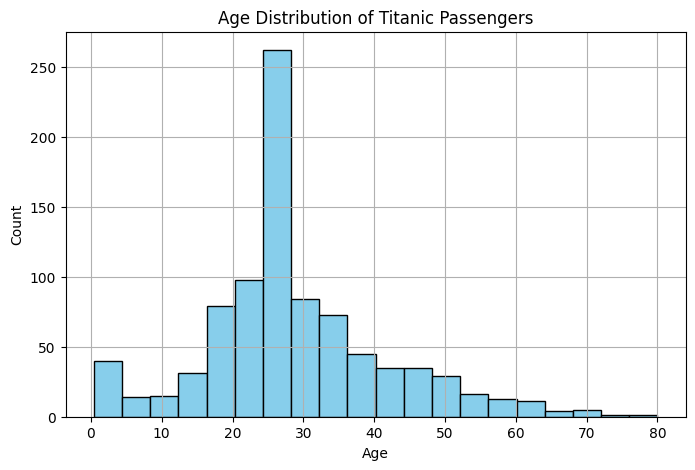

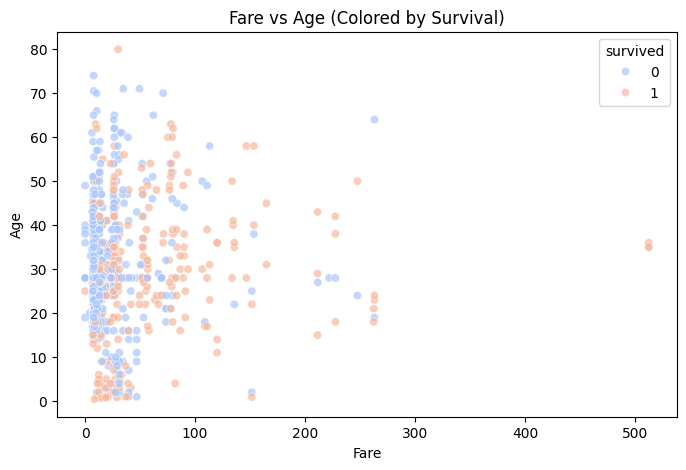

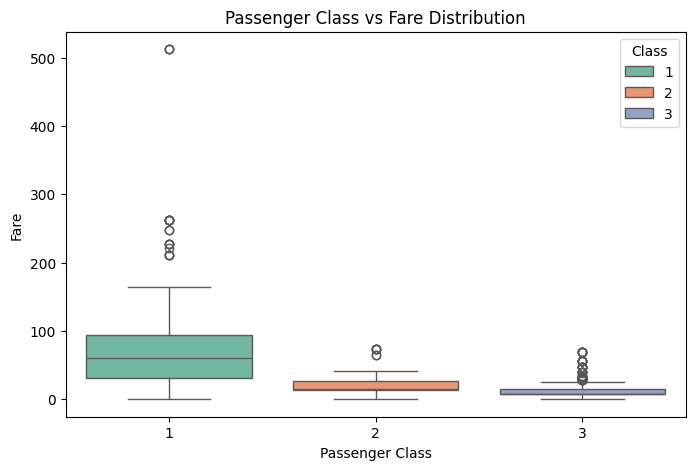

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler

# Ensure the directory for saving images exists
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

# Ensure column names are lowercase and stripped of extra spaces
df.columns = df.columns.str.strip().str.lower()

# Display basic dataset information
print(df.info())

# ✅ Missing Data Visualization
plt.figure(figsize=(8, 5))
msno.bar(df, color="dodgerblue", sort="descending")
plt.title("Missing Values in Titanic Dataset")
plt.savefig(os.path.join(output_dir, "missing_values.png"), dpi=300, bbox_inches="tight")  # Save image
plt.show()

# Verify that required columns exist
required_columns = ["age", "fare", "survived", "pclass"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: Missing columns in dataset: {missing_columns}")
    exit()

# ✅ Handle missing values using median imputation
df.fillna({"age": df["age"].median(), "fare": df["fare"].median()}, inplace=True)

# 🔄 Standardizing the "age" and "fare" columns
scaler = StandardScaler()
df[["age_scaled", "fare_scaled"]] = scaler.fit_transform(df[["age", "fare"]])

# 📊 Histogram: Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Titanic Passengers")
plt.savefig(os.path.join(output_dir, "age_distribution.png"), dpi=300, bbox_inches="tight")  # Save image
plt.show()

# 📉 Scatter plot: Fare vs Age (Colored by Survival)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["fare"], y=df["age"], hue=df["survived"], palette="coolwarm", alpha=0.7)
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Fare vs Age (Colored by Survival)")
plt.savefig(os.path.join(output_dir, "fare_vs_age.png"), dpi=300, bbox_inches="tight")  # Save image
plt.show()

# 📦 Box plot: Fare distribution by Passenger Class
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["pclass"], y=df["fare"], hue=df["pclass"], palette="Set2")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Passenger Class vs Fare Distribution")
plt.legend(title="Class")
plt.savefig(os.path.join(output_dir, "fare_distribution_by_class.png"), dpi=300, bbox_inches="tight")  # Save image
plt.show()

